Method 1: SMOTE

In [25]:
import os
import sys
sys.path.append("./../src/")
from utilities import REPO_PATH, DATA_PATH, RESPONSE_COL_NAME, get_feature_corr_with_response

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
seed = 0
random.seed(seed)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
train = pd.read_csv(f"{DATA_PATH}/train.csv")
test = pd.read_csv(f"{DATA_PATH}/test.csv")
val = pd.read_csv(f"{DATA_PATH}/val.csv")

In [28]:
X_train, y_train = train.drop([RESPONSE_COL_NAME], axis=1), train[RESPONSE_COL_NAME]
y_test, X_test = test[RESPONSE_COL_NAME], test.drop([RESPONSE_COL_NAME],axis=1)

In [29]:
beforeCounter = Counter(y_train)
print("Before:", beforeCounter)

Before: Counter({True: 17000, False: 424})


In [30]:
sample_ratios = np.arange(0.1,1,0.1)

In [31]:
accuracy_scores_by_ratio = []
for ratio in sample_ratios:
    smt = SMOTE(sampling_strategy=ratio)
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    afterCounter = Counter(y_train_sm)
    print("After:", afterCounter)

    clf = GaussianNB()
    clf.fit(X_train_sm, y_train_sm)
    y_preds = clf.predict(X_test)
    accuracy = accuracy_score(y_preds, y_test)
    accuracy_scores_by_ratio.append(accuracy)
    print("Accuracy:", accuracy)
    print(" ")
    

After: Counter({True: 17000, False: 1700})
Accuracy: 0.5607142857142857
 
After: Counter({True: 17000, False: 3400})
Accuracy: 0.5714285714285714
 
After: Counter({True: 17000, False: 5100})
Accuracy: 0.5642857142857143
 
After: Counter({True: 17000, False: 6800})
Accuracy: 0.5821428571428572
 
After: Counter({True: 17000, False: 8500})
Accuracy: 0.5821428571428572
 
After: Counter({True: 17000, False: 10200})
Accuracy: 0.5857142857142857
 
After: Counter({True: 17000, False: 11900})
Accuracy: 0.5857142857142857
 
After: Counter({True: 17000, False: 13600})
Accuracy: 0.5892857142857143
 
After: Counter({True: 17000, False: 15300})
Accuracy: 0.5964285714285714
 


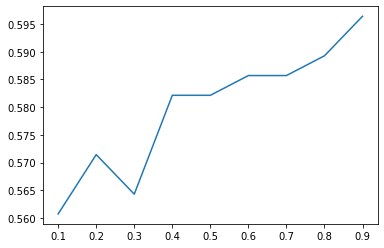

In [32]:
plt.plot(sample_ratios, accuracy_scores_by_ratio)
plt.show()